In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [4]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/amazon.csv')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1463 entries, 47 to 1279
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   product_id                       1463 non-null   object 
 1   product_name                     1463 non-null   object 
 2   category                         1463 non-null   object 
 3   discounted_price                 1463 non-null   float64
 4   actual_price                     1463 non-null   float64
 5   discount_percentage              1463 non-null   float64
 6   rating                           1463 non-null   float64
 7   rating_count                     1463 non-null   float64
 8   about_product                    1463 non-null   object 
 9   user_id                          1463 non-null   object 
 10  user_name                        1463 non-null   object 
 11  review_id                        1463 non-null   object 
 12  review_title            

In [6]:
df[df['rating_count'].isna()==True]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,80%,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,₹249,₹999,75%,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


In [8]:
df['rating'] = df['rating'].replace('', np.nan)
df['rating'] = df['rating'].str.replace('\'', '')
df['rating'] = df['rating'].str.replace('|', '')
df['rating'] = df['rating'].astype(float)

In [14]:
str_columns = df.select_dtypes(include=['object']).columns
for col in str_columns:
    df[col] = df[col].str.replace('|', '')
    df[col] = df[col].replace('', np.nan)
    df[col] = df[col].str.replace('\'', '')
    df[col] = df[col].str.replace(',','')
    df[col] = df[col].str.replace('₹', '')


In [31]:
#df['rating_count']=df['rating_count'].astype(int)
#df['rating_count'] = df['rating_count'].fillna(0).astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [16]:
df['rating_count'] = df['rating_count'].replace('', np.nan)
df['rating_count'] = df['rating_count'].str.replace('\'', '')
df['rating_count'] = df['rating_count'].str.replace('|', '')
df['rating_count'] = df['rating_count'].astype(float)

In [19]:
df.isna().sum()
df[df['rating'].isna()==True]
df['rating'] = df['rating'].fillna(0).astype(float)

In [20]:
df['discounted_price']=df['discounted_price'].astype(float)

In [21]:
df['actual_price']=df['actual_price'].astype(float)

In [22]:
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '')
df['discount_percentage']=df['discount_percentage'].astype(float)

####1).What is the average rating for each product category

In [23]:
avg_rating_category=df.groupby('category')['rating'].mean()
print(avg_rating_category)

category
Car&MotorbikeCarAccessoriesInteriorAccessoriesAirPurifiers&Ionizers                                                3.800000
Computers&AccessoriesAccessories&PeripheralsAdaptersUSBtoUSBAdapters                                               4.150000
Computers&AccessoriesAccessories&PeripheralsAudio&VideoAccessoriesPCHeadsets                                       3.500000
Computers&AccessoriesAccessories&PeripheralsAudio&VideoAccessoriesPCMicrophones                                    3.600000
Computers&AccessoriesAccessories&PeripheralsAudio&VideoAccessoriesPCSpeakers                                       4.050000
                                                                                                                     ...   
OfficeProductsOfficePaperProductsPaperStationeryPensPencils&WritingSuppliesPens&RefillsGelInkRollerballPens        4.250000
OfficeProductsOfficePaperProductsPaperStationeryPensPencils&WritingSuppliesPens&RefillsLiquidInkRollerballPens     4.150000

####2)What are the top rating_count products by category

In [26]:
top_rated_products = df.groupby('category')['rating_count'].max()
print(top_rated_products.head(5))

category
Car&MotorbikeCarAccessoriesInteriorAccessoriesAirPurifiers&Ionizers                 1118.0
Computers&AccessoriesAccessories&PeripheralsAdaptersUSBtoUSBAdapters                4426.0
Computers&AccessoriesAccessories&PeripheralsAudio&VideoAccessoriesPCHeadsets        7222.0
Computers&AccessoriesAccessories&PeripheralsAudio&VideoAccessoriesPCMicrophones    14969.0
Computers&AccessoriesAccessories&PeripheralsAudio&VideoAccessoriesPCSpeakers        7352.0
Name: rating_count, dtype: float64


####3).What is the distribution of discounted prices vs. actual prices

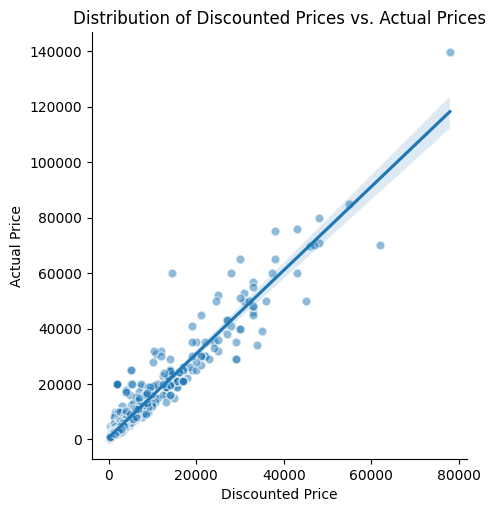

In [27]:
jittered_discounted_price = df['discounted_price'] + np.random.normal(0, 0.5, df['discounted_price'].shape)
jittered_actual_price = df['actual_price'] + np.random.normal(0, 0.5, df['actual_price'].shape)
# Scatter plot with jittering and transparency
sns.lmplot(data=df, x='discounted_price', y='actual_price', scatter_kws={'alpha':0.5, 's':40, 'edgecolor':'w'})
plt.title("Distribution of Discounted Prices vs. Actual Prices")
plt.xlabel("Discounted Price")
plt.ylabel("Actual Price")
plt.show()

####4.How does the average discount percentage vary across categories

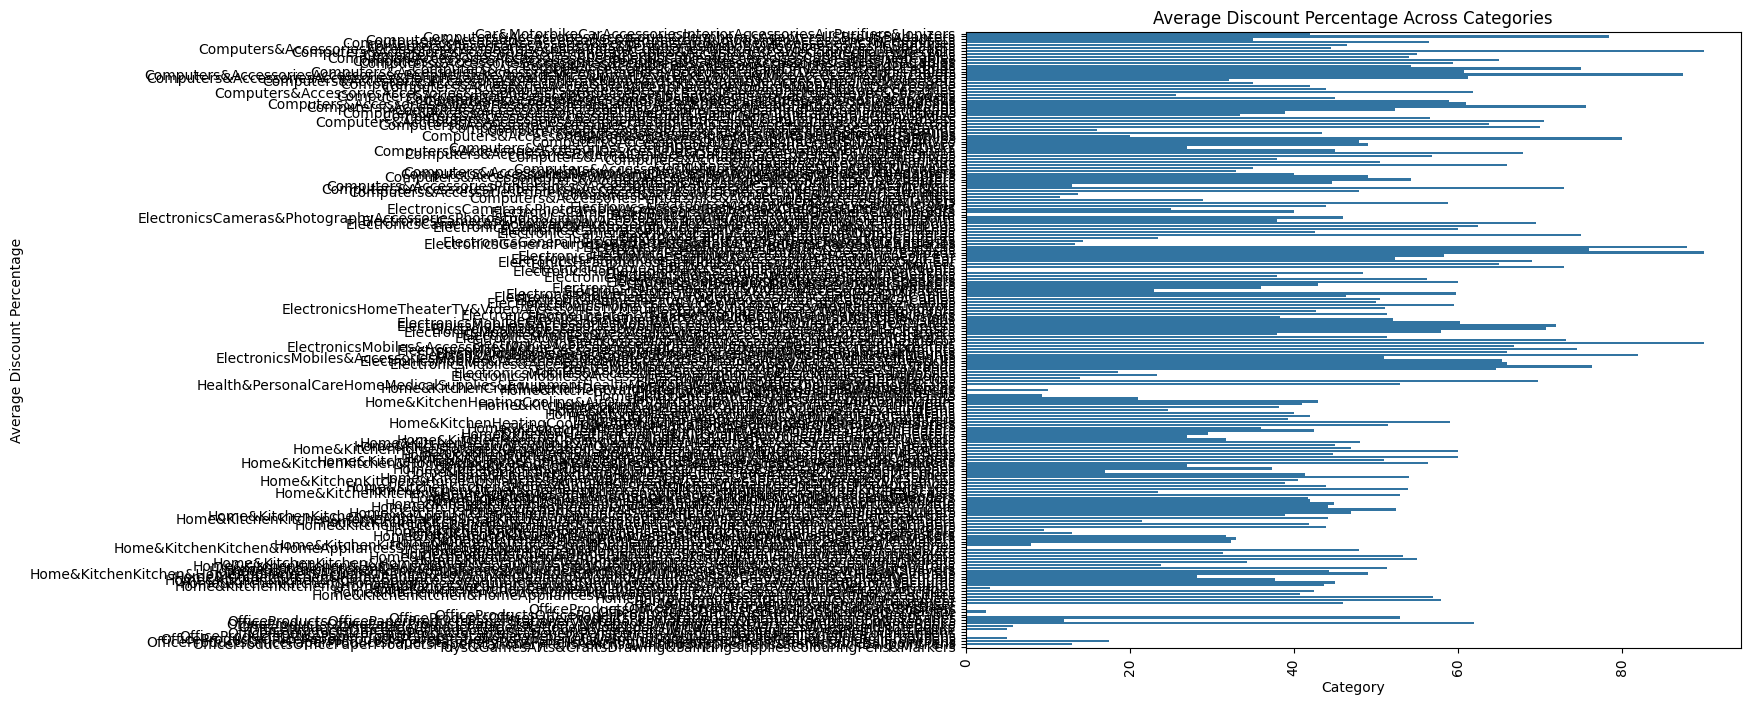

In [28]:
avg_discount_category = df.groupby('category')['discount_percentage'].mean().reset_index()
# Bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='discount_percentage',y='category', data=avg_discount_category)
plt.title('Average Discount Percentage Across Categories')
plt.xlabel('Category')
plt.ylabel('Average Discount Percentage')
plt.xticks(rotation=90)  # Rotate category labels for better readability
plt.show()

####5.What are the most popular product names?

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['rating', 'rating_count']] = scaler.fit_transform(df[['rating', 'rating_count']])
# Create a popularity score (weights can be adjusted based on importance)
df['popularity_score'] = (df['rating'] * 0.6) + (df['rating_count'] * 0.4)
# Sort products based on popularity score
df = df.sort_values(by='popularity_score', ascending=False)
# Get the most popular product names
most_popular_products = df[['product_name', 'popularity_score']]
print(most_popular_products.head(10))

                                          product_name  popularity_score
47   Amazon Basics High-Speed HDMI Cable 6 Feet - S...          0.928000
12   AmazonBasics Flexible Premium HDMI Cable (Blac...          0.928000
65   Amazon Basics High-Speed HDMI Cable 6 Feet (2-...          0.928000
684  AmazonBasics Flexible Premium HDMI Cable (Blac...          0.927999
400  boAt Bassheads 100 in Ear Wired Earphones with...          0.832736
352  boAt Bassheads 100 in Ear Wired Earphones with...          0.832736
584  boAt BassHeads 100 in-Ear Wired Headphones wit...          0.832734
371  Redmi 9A Sport (Coral Green 2GB RAM 32GB Stora...          0.786010
370  Redmi 9 Activ (Carbon Black 4GB RAM 64GB Stora...          0.786010
566  Redmi 9A Sport (Coral Green 3GB RAM 32GB Stora...          0.786006


####6.What are the most popular product keywords

In [30]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import re
# Combine text columns into a single string for analysis
df['combined_text'] = df['product_name'] + ' ' + df['category'] + ' ' + df['about_product'] + ' ' + df['review_title'] + ' ' + df['review_content']
# Clean the text
df['combined_text'] = df['combined_text'].apply(lambda x: re.sub('[^a-zA-Z0-9\s]', '', x.lower()))
# Tokenize and count word frequencies
vectorizer = CountVectorizer(stop_words='english')
word_counts = vectorizer.fit_transform(df['combined_text'])
word_counts = pd.DataFrame(word_counts.toarray(), columns=vectorizer.get_feature_names_out())
# Sum word frequencies across all rows
word_frequencies = word_counts.sum(axis=0).sort_values(ascending=False)
# Get the most popular keywords (top 20)
popular_keywords = word_frequencies.head(20)
print(f"popular key words are :\n {popular_keywords}")

popular key words are :
 good        5691
product     4122
quality     2765
cable       2643
use         2088
charging    1885
usb         1830
like        1418
price       1391
easy        1344
phone       1268
battery     1188
fast        1178
tv          1173
watch       1138
using       1083
time        1066
power       1021
water        988
just         982
dtype: int64


####7.What are the most popular product reviews

In [42]:
df['combined_review'] = df['review_title'] + ' ' + df['review_content']
# Normalize the columns
scaler = MinMaxScaler()
df[['rating', 'rating_count']] = scaler.fit_transform(df[['rating', 'rating_count']])
# Create a popularity score (weights can be adjusted based on importance)
df['product_review_popularity_score'] = (df['rating'] * 0.6) + (df['rating_count'] * 0.4)
# Sort reviews based on popularity score
df = df.sort_values(by='product_review_popularity_score', ascending=False)
# Get the most popular reviews
most_popular_reviews = df[['product_name', 'combined_review', 'product_review_popularity_score']]
most_popular_reviews.head()

,product_name,combined_review,product_review_popularity_score
47,Amazon Basics High-Speed HDMI Cable 6 Feet - S...,Its quite good and value for moneyWorks wellHd...,0.928000
12,AmazonBasics Flexible Premium HDMI Cable (Blac...,Its quite good and value for moneyWorks wellHd...,0.928000
65,Amazon Basics High-Speed HDMI Cable 6 Feet (2-...,Its quite good and value for moneyWorks wellHd...,0.928000
684,AmazonBasics Flexible Premium HDMI Cable (Blac...,Its quite good and value for moneyWorks wellHd...,0.927999
400,boAt Bassheads 100 in Ear Wired Earphones with...,Best value for moneyHEAD PHONE POUCH NOT RECEI...,0.832736


####8.What is the correlation between discounted_price and rating

The correlation between discounted_price and rating is: 0.11


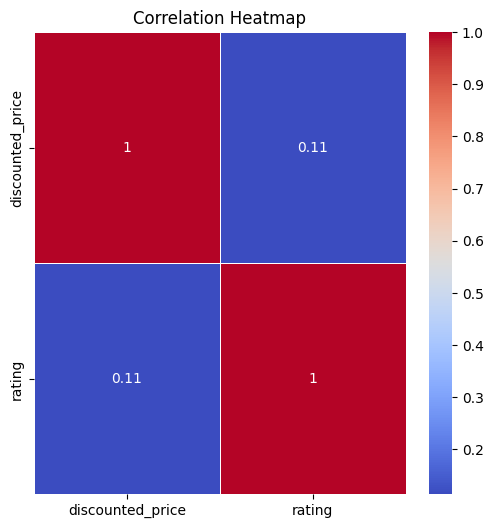

In [52]:
correlation = df['discounted_price'].corr(df['rating'])
print(f"The correlation between discounted_price and rating is: {correlation:.2f}")
correlation_matrix = df[['discounted_price', 'rating']].corr()
plt.figure(figsize=(6, 6))  # Adjust the figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#####Insights>>> Discounted price and rating has strong correlation

####9.What are the Top 5 categories based on the highest ratings

In [54]:
top_rating_categories=df.groupby('category')['rating'].mean()
top_rating_categories=top_rating_categories.sort_values(ascending=False)
top_rating_categories.head(5)


,rating
category,
Computers&AccessoriesTablets,0.92
OfficeProductsOfficeElectronicsCalculatorsBasic,0.90
Home&KitchenKitchen&HomeAppliancesSmallKitchenAppliancesSmallApplianceParts&Accessories,0.90
Home&KitchenKitchen&HomeAppliancesCoffeeTea&EspressoCoffeePresses,0.90
Computers&AccessoriesNetworkingDevicesNetworkAdaptersPowerLANAdapters,0.90


####10.Identify any potential areas for improvement or optimization based on the data analysis?

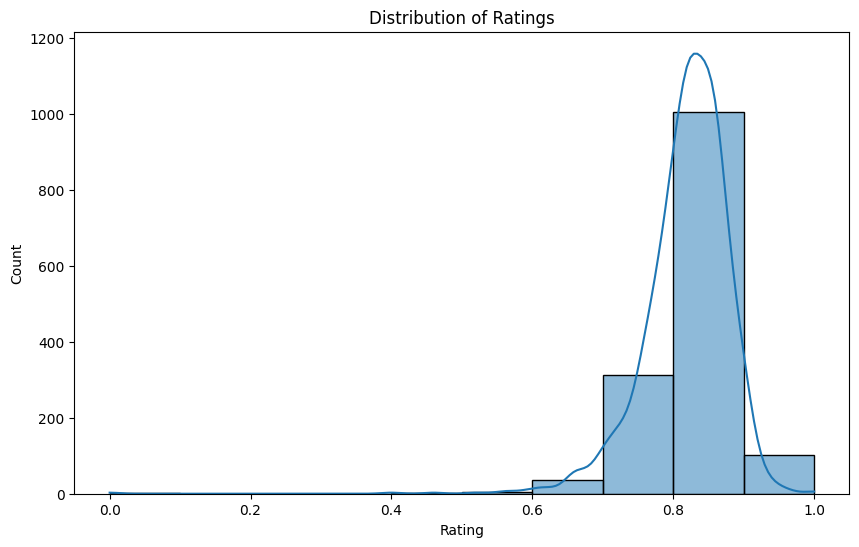

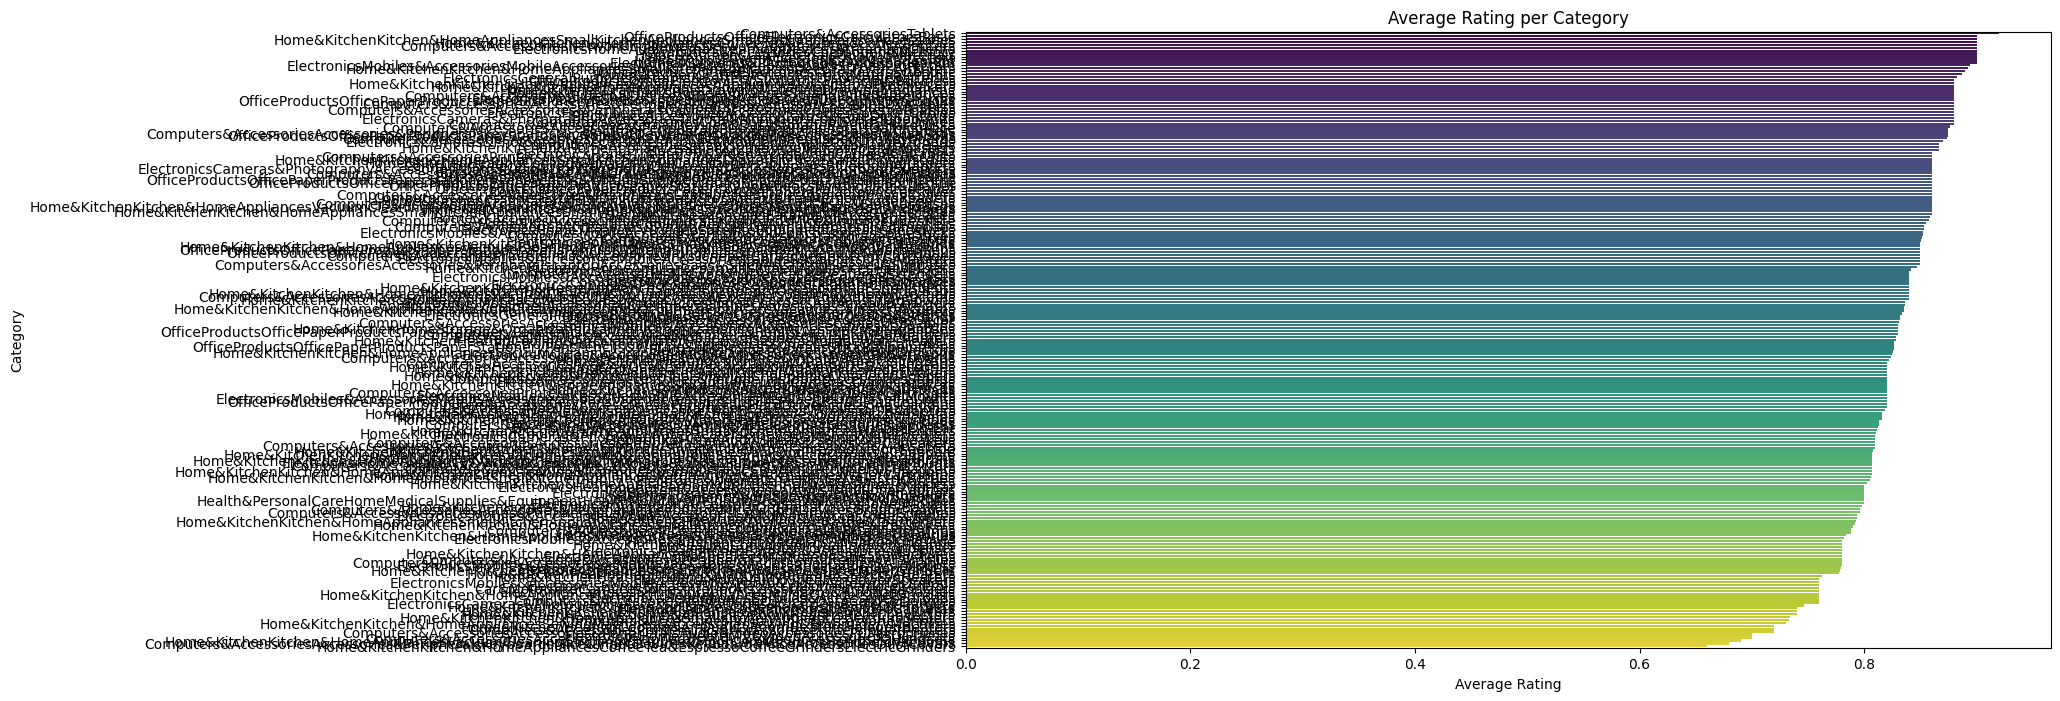

In [62]:
df.dropna(inplace=True)
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()
# Average rating per category
category_mean_rating = df.groupby('category')['rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(14, 8))
sns.barplot(x=category_mean_rating.values, y=category_mean_rating.index, palette='viridis')
plt.title('Average Rating per Category')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.show()

In [63]:
df.duplicated().sum()

0

In [75]:
df.drop('about_product', inplace=True, axis=1)

In [79]:
df.rename(columns={'Original_Price':'Original_Price(₹)','discounted_price':'Discounted_Price(₹)'}, inplace=True)
df.head()

,product_name,category,Discounted_Price(₹),Original_Price(₹),discount_percentage(%),rating,rating_count,user_id,user_name,review_id,review_title,review_content,popularity_score,combined_text,combined_review,product_review_popularity_score
47,Amazon Basics High-Speed HDMI Cable 6 Feet - S...,ElectronicsHomeTheaterTV&VideoAccessoriesCable...,309.0,475.0,35.0,0.88,1.000000,AEYJ5I6JZZPOJB6MGWRQOHRQLPSQAFY5TVFOMVHGBPBTIJ...,Rishav GossainShashank MallamrajuPurnendugunas...,R1FKOKZ3HHKJBZR2WNMZI1EXTA0HRCA1M3W4RIXURR3BKC...,Its quite good and value for moneyWorks wellHd...,I am using it for 14 days now. The experience ...,0.928000,amazon basics highspeed hdmi cable 6 feet sup...,Its quite good and value for moneyWorks wellHd...,0.928000
12,AmazonBasics Flexible Premium HDMI Cable (Blac...,ElectronicsHomeTheaterTV&VideoAccessoriesCable...,219.0,700.0,69.0,0.88,1.000000,AEYJ5I6JZZPOJB6MGWRQOHRQLPSQAFY5TVFOMVHGBPBTIJ...,Rishav GossainShashank MallamrajuPurnendugunas...,R1FKOKZ3HHKJBZR2WNMZI1EXTA0HRCA1M3W4RIXURR3BKC...,Its quite good and value for moneyWorks wellHd...,I am using it for 14 days now. The experience ...,0.928000,amazonbasics flexible premium hdmi cable black...,Its quite good and value for moneyWorks wellHd...,0.928000
65,Amazon Basics High-Speed HDMI Cable 6 Feet (2-...,ElectronicsHomeTheaterTV&VideoAccessoriesCable...,309.0,1400.0,78.0,0.88,1.000000,AEYJ5I6JZZPOJB6MGWRQOHRQLPSQAFY5TVFOMVHGBPBTIJ...,Rishav GossainShashank MallamrajuPurnendugunas...,R1FKOKZ3HHKJBZR2WNMZI1EXTA0HRCA1M3W4RIXURR3BKC...,Its quite good and value for moneyWorks wellHd...,I am using it for 14 days now. The experience ...,0.928000,amazon basics highspeed hdmi cable 6 feet 2pac...,Its quite good and value for moneyWorks wellHd...,0.928000
684,AmazonBasics Flexible Premium HDMI Cable (Blac...,ElectronicsHomeTheaterTV&VideoAccessoriesCable...,219.0,700.0,69.0,0.88,0.999998,AEYJ5I6JZZPOJB6MGWRQOHRQLPSQAFY5TVFOMVHGBPBTIJ...,Rishav GossainShashank MallamrajuPurnendugunas...,R1FKOKZ3HHKJBZR2WNMZI1EXTA0HRCA1M3W4RIXURR3BKC...,Its quite good and value for moneyWorks wellHd...,I am using it for 14 days now. The experience ...,0.927999,amazonbasics flexible premium hdmi cable black...,Its quite good and value for moneyWorks wellHd...,0.927999
400,boAt Bassheads 100 in Ear Wired Earphones with...,ElectronicsHeadphonesEarbuds&AccessoriesHeadph...,379.0,999.0,62.0,0.82,0.851840,AF4MVO4JNFDEPWFKZO62OAJKRIWAAHVPAXEWPATRASBKHO...,tarun kumarmahesh radheshyam tawariBlackspadeM...,R2DD2M5YARW7R2R2M9ZYNGGV1ZLNRNWNTRNLSJWSBR3BJB...,Best value for moneyHEAD PHONE POUCH NOT RECEI...,The sound quality of this earphone are really ...,0.832736,boat bassheads 100 in ear wired earphones with...,Best value for moneyHEAD PHONE POUCH NOT RECEI...,0.832736
